# Etapa 2 - Data Cleaning e Análise Exploratória

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
# Configurando o matplotlib
%matplotlib inline                              
import matplotlib.pyplot as plt

import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando a base de dados
df = pd.read_csv(r'../data/sales_db_01.csv')

### Data Celaning

In [3]:
# Visualizando a base de dados
df.head(3)

,sale_date,order_id,customer_id,product_id,product_category_name,product_description_lenght,order_units,unit_price,zip_code_prefix,customer_state
0,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,utilidades_domesticas,268.0,1,29.99,3149,SP
1,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,perfumaria,178.0,1,118.70,47813,BA
2,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,automotivo,232.0,1,159.90,75265,GO


In [4]:
# Visualizando as informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100196 entries, 0 to 100195
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sale_date                   100196 non-null  object 
 1   order_id                    100196 non-null  object 
 2   customer_id                 100196 non-null  object 
 3   product_id                  100196 non-null  object 
 4   product_category_name       98795 non-null   object 
 5   product_description_lenght  98795 non-null   float64
 6   order_units                 100196 non-null  int64  
 7   unit_price                  100196 non-null  float64
 8   zip_code_prefix             100196 non-null  int64  
 9   customer_state              100196 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


- Sem uma coluna de nome do produto, acaba sendo inviável estabelecer uma correlação para determinar o a categoria dos produtos sem essa informação. Dessa forma, como as informações faltantes representam menos de 2% das informações totais, optei por excluir as linhas com dados nulos.

In [5]:
# Tratando valores nulos das colunas product_category_name e product_description_lenght
# Avaliando a porcentagem de valores nulos perdidos
print("Porcentagem de dados faltantes por coluna:")
for i in range(len(df.columns)):
    print('{}: {:.2f} %' .format(df.columns[i], 100*(df.loc[(df['product_category_name'].isnull() == True) & (df['product_description_lenght'].isnull() == True)].count() / df.shape[0])[i]))

Porcentagem de dados faltantes por coluna:
sale_date: 1.40 %
order_id: 1.40 %
customer_id: 1.40 %
product_id: 1.40 %
product_category_name: 0.00 %
product_description_lenght: 0.00 %
order_units: 1.40 %
unit_price: 1.40 %
zip_code_prefix: 1.40 %
customer_state: 1.40 %


In [6]:
# Retirando as linhas nulas de product_category_name e product_description_lenght
df = df.dropna()

### Análise Exploratória

In [7]:
# Utilizando o profile report
profile = ProfileReport(df)
profile.to_file("../reports/eda_sales_pred.html")

In [8]:
# Desconsiderando o horário das datas
dates = []
for date in df['sale_date'].values:
    dates.append(date[:10])

df['sale_date'] =  dates

In [9]:
#  Transformando a coluna de data para datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [10]:
# Criando base para plotar vendas históricas
df_chart = df[['sale_date', 'order_units']].groupby('sale_date', as_index = False).sum()
df_chart.head()

,sale_date,order_units
0,2016-09-15,3
1,2016-10-03,7
2,2016-10-04,62
3,2016-10-05,48
4,2016-10-06,47


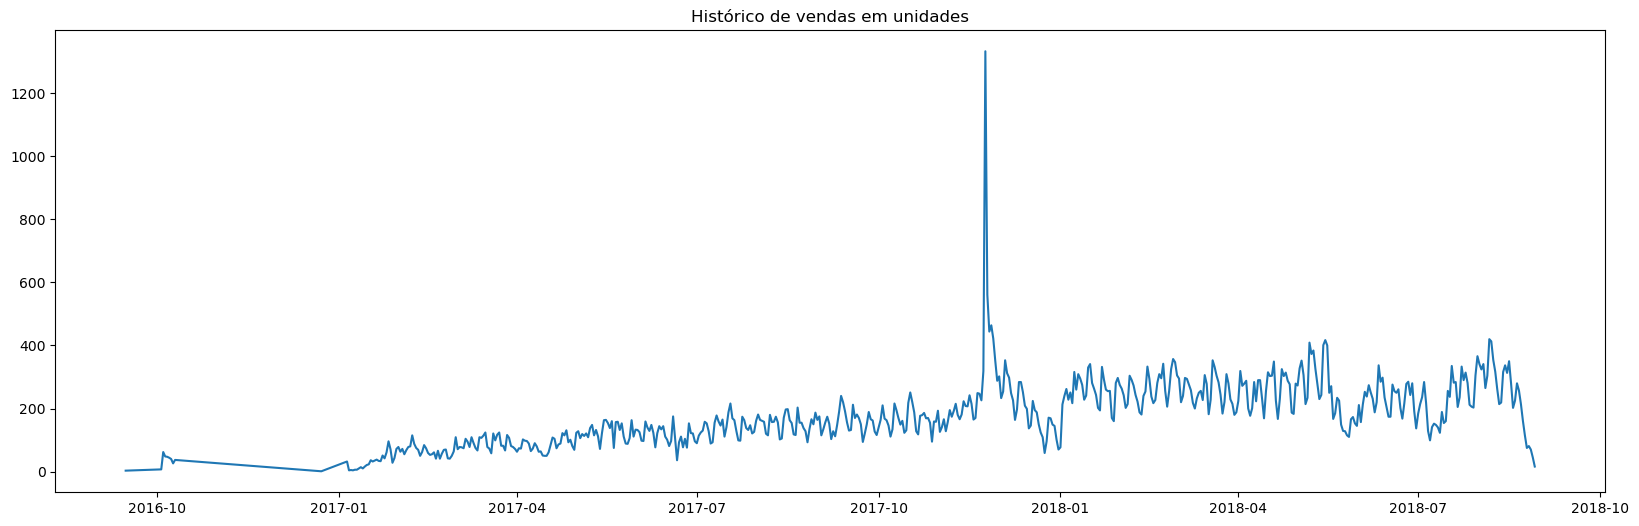

In [11]:
# Plotar resultados
fig, ax = plt.subplots(figsize = (20,6))

ax.plot(df_chart['sale_date'], df_chart['order_units'])
plt.title('Histórico de vendas em unidades')

plt.show()

In [12]:
# Avaliando o período de pico de vendas
df_chart.loc[df_chart['order_units'] > 400]

,sale_date,order_units
333,2017-11-24,1333
334,2017-11-25,561
335,2017-11-26,444
336,2017-11-27,464
337,2017-11-28,422
497,2018-05-07,409
504,2018-05-14,401
505,2018-05-15,417
588,2018-08-06,420
589,2018-08-07,413


- Os 6 maiores dias de vendas aconteceram na black fiday de 2017 (última sexta-feira do mês de novembro). Essa é uma data que se repete todo ano e, por isso, faz sentido manter esses registros, por mais que fujam muito do padrão.
- Na etapa de Feature Engineering, uma feature será adicionada para identificar esse evento.

In [13]:
# Visualizando a descrição estatística das colunas numéricas
with pd.option_context('display.float_format', "{:.2f}".format):
    display(df.describe())

,sale_date,product_description_lenght,order_units,unit_price,zip_code_prefix
count,98795,98795.00,98795.00,98795.00,98795.00
mean,2018-01-02 02:12:19.932182784,786.56,1.10,123.87,35127.43
min,2016-09-15 00:00:00,4.00,1.00,0.85,1003.00
25%,2017-09-14 00:00:00,348.00,1.00,40.00,11320.00
50%,2018-01-21 00:00:00,603.00,1.00,78.00,24416.00
75%,2018-05-06 00:00:00,986.00,1.00,139.00,58900.00
max,2018-08-29 00:00:00,3992.00,20.00,6735.00,99980.00
std,NaN,649.70,0.46,187.43,29820.77


- Avaliando o pairplot, temos que a coluna de product_description_lenght não tem correlação relevante com o número de unidades vendidas. Assim, essa coluna também será excluida.

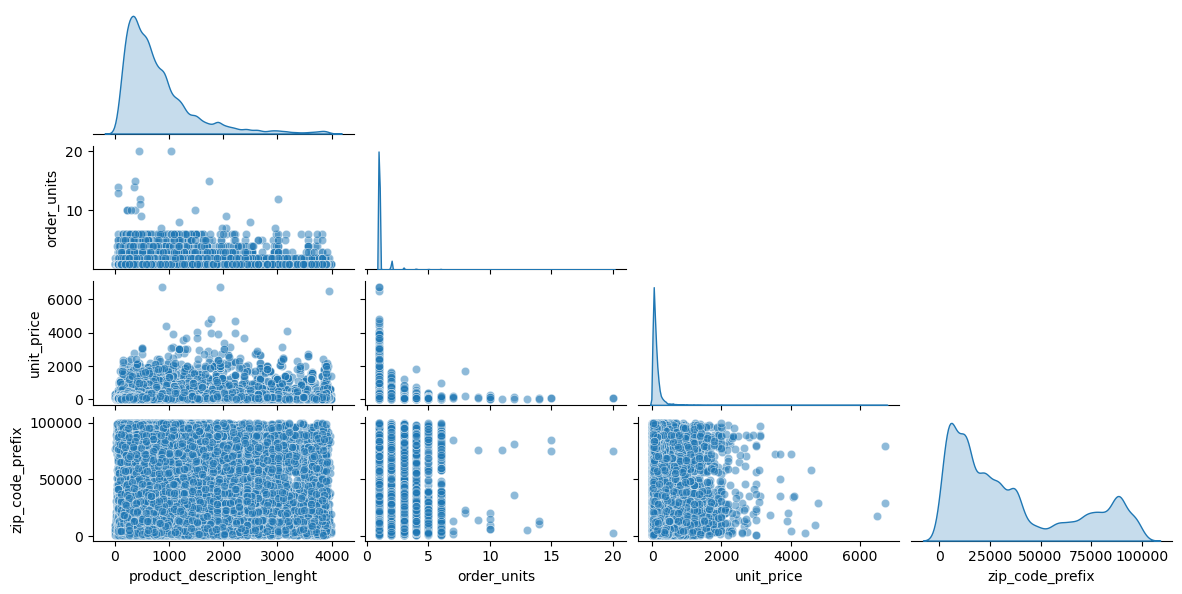

In [14]:
# Plotando um KDE correlacionando as variáveis numéricas
sns.pairplot(
    df,
    diag_kind = 'kde',
    plot_kws=dict(alpha=0.5),
    corner=True,
    palette='tab10',
    height=1.5,
    aspect=2
    );

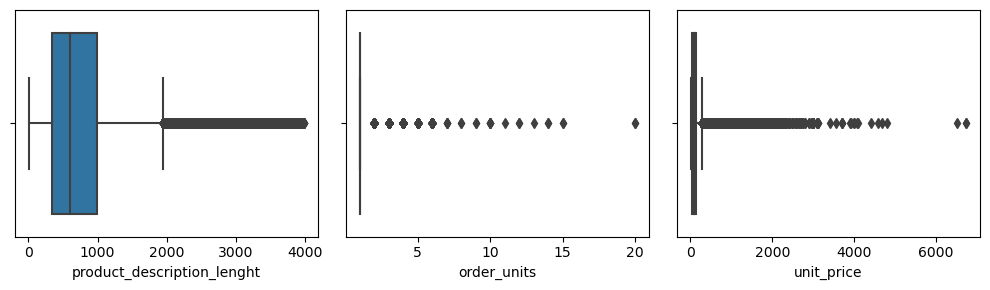

In [15]:
# Plotando os boxplots para avaliar a distribuição dos dados
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3), tight_layout = True)

for ax, col in zip(axs, df.select_dtypes('number')):
    sns.boxplot(data = df, x = col, ax=ax)

plt.show()

In [16]:
# Avaliando a cardinalidade das features
print('Cardinalidade das Features:')
df.nunique()

Cardinalidade das Features:


sale_date                       612
order_id                      95146
customer_id                   95146
product_id                    31632
product_category_name            73
product_description_lenght     2944
order_units                      16
unit_price                     5793
zip_code_prefix               14844
customer_state                   27
dtype: int64

- Avaliando a cardinalidade das colunas(número de valores distintos), temos que as colunas de order-id, customer_id, product_id são números de identificação específicos para cada pedido. Esse tipo de informação não agrega valor à análise e, por isso, as colunas serão desconsideradas.
- A coluna de Zip_code_prefix também será excluida para evitar duplicidade de informações, já que a região de venda é representada pela coluna customer_state.

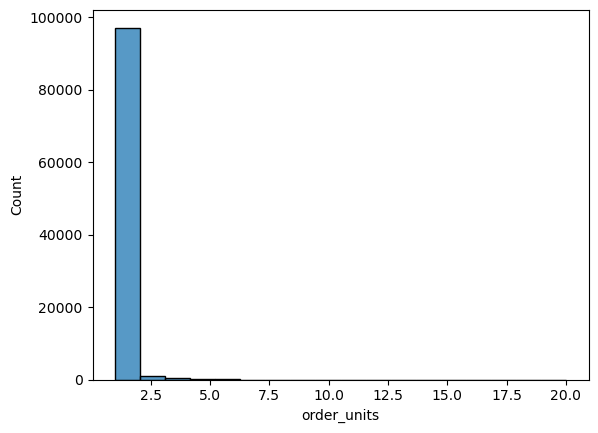

In [17]:
# Avaliando outliers de vendas em unidades
sns.histplot(df.order_units);

In [18]:
# Avaliando as vendas com 7 unidades ou mais
df.loc[df['order_units'] >= 7].sort_values('order_units', ascending = False)

,sale_date,order_id,customer_id,product_id,product_category_name,product_description_lenght,order_units,unit_price,zip_code_prefix,customer_state
94717,2017-08-23,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,9571759451b1d780ee7c15012ea109d4,automotivo,1042.0,20,98.70,74825,GO
87576,2018-02-22,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,ee3d532c8a438679776d222e997606b3,informatica_acessorios,452.0,20,100.00,3029,SP
66935,2017-01-30,9ef13efd6949e4573a18964dd1bbe7f5,adb32467ecc74b53576d9d13a5a55891,37eb69aca8718e843d897aa7b82f462d,ferramentas_jardim,369.0,15,51.00,74885,GO
30539,2017-11-23,428a2f660dc84138d969ccd69a0ab6d5,10de381f8a8d23fff822753305f71cae,89b190a046022486c635022524a974a8,moveis_decoracao,1744.0,15,65.49,84600,PR
27571,2017-12-13,73c8ab38f07dc94389065f7eba4f297a,d5f2b3f597c7ccafbb5cac0bcc3d6024,422879e10f46682990de24d770e7f83d,ferramentas_jardim,348.0,14,59.00,11065,SP
27839,2018-02-21,9bdc4d4c71aa1de4606060929dee888c,a7693fba2ff9583c78751f2b66ecab9d,44a5d24dd383324a421569ca697b13c2,telefonia,55.0,14,29.99,13330,SP
48279,2018-04-12,37ee401157a3a0b28c9c6d0ed8c3b24b,7d321bd4e8ba1caf74c4c1aabd9ae524,d34c07a2d817ac73f4caf8c574215fed,telefonia,56.0,13,29.99,5006,SP
8396,2018-01-11,3a213fcdfe7d98be74ea0dc05a8b31ae,91f92cfee46b79581b05aa974dd57ce5,a62e25e09e05e6faf31d90c6ec1aa3d1,relogios_presentes,3006.0,12,108.00,81280,PR
17127,2017-10-09,2c2a19b5703863c908512d135aa6accc,0d93f21f3e8543a9d0d8ece01561f5b2,03e1c946c0ddfc58724ff262aef08dff,utilidades_domesticas,465.0,12,20.70,36025,MG
91116,2018-07-25,6c355e2913545fa6f72c40cbca57729e,d95ca02ab50105ccce682bdf9ffdc3b4,32e18e89237933ebdaaebd78a27e7fa1,utilidades_domesticas,464.0,11,26.18,75905,GO


- De fato existem poucos registros de vendas de mais de uma unidade no mesmo pedido. Porém, esses dados serão mantidos, já que não existe um padrão claro para a venda de mais unidades de um produto por pedido e, ao que tudo indica, é apenas a representação da dinâmica de vendas de determinados produtos

In [19]:
# # Excluindo as colunas
df = df.drop(['order_id', 'customer_id', 'product_id', 'product_description_lenght', 'zip_code_prefix'], axis = 1)

In [20]:
# Salvando a nova base
df.to_csv(r'../data/sales_db_02.csv', index = False)